<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/tarea_2_Teoria_de_aprendisaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Cargar imágenes

# Importamos la librería Image de Pillow para trabajar con imágenes
from PIL import Image
# Importamos la librería matplotlib para mostrar imágenes si es necesario
import matplotlib.pyplot as plt

# Definimos las rutas de los archivos de imagen.
# Asegúrate de que estas rutas coincidan con la ubicación de tus archivos en Colab.
image_paths = [
    '/content/sample_data/descarga.jfif',
    '/content/sample_data/images.jfif',
    '/content/sample_data/descarga (1).jfif'
]

# Usamos un bloque try-except para manejar posibles errores durante la carga de archivos
try:
    # Abrimos cada archivo de imagen utilizando Image.open()
    img1 = Image.open(image_paths[0])
    img2 = Image.open(image_paths[1])
    img3 = Image.open(image_paths[2])

    # Imprimimos un mensaje de éxito si las imágenes se cargan sin errores
    print("Imágenes cargadas correctamente.")

    # Opcional: Imprimir información sobre cada imagen (formato, tamaño)
    print(f"Imagen 1 - Formato: {img1.format}, Tamaño: {img1.size}")
    print(f"Imagen 2 - Formato: {img2.format}, Tamaño: {img2.size}")
    print(f"Imagen 3 - Formato: {img3.format}, Tamaño: {img3.size}")

except FileNotFoundError:
    # Si no se encuentra algún archivo, mostramos un mensaje de error específico
    print("Error: Asegúrate de que las rutas de las imágenes sean correctas y los archivos existan.")
    # Asignamos None a las variables de imagen para indicar que no se pudieron cargar
    img1, img2, img3 = None, None, None
except Exception as e:
    # Capturamos cualquier otro tipo de error que pueda ocurrir durante la carga
    print(f"Ocurrió un error al cargar las imágenes: {e}")
    # Asignamos None a las variables de imagen
    img1, img2, img3 = None, None, None

# Nota: En este paso solo cargamos las imágenes en memoria.
# Aún no hemos modificado su tamaño ni las hemos convertido a un formato numérico.

Imágenes cargadas correctamente.
Imagen 1 - Formato: JPEG, Tamaño: (148, 148)
Imagen 2 - Formato: JPEG, Tamaño: (173, 291)
Imagen 3 - Formato: JPEG, Tamaño: (148, 148)


Imágenes escaladas a (100, 100).


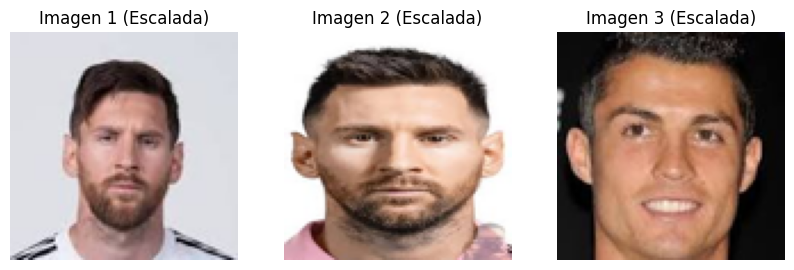

In [ ]:
# Paso 2: Preprocesamiento de imágenes (Escalar a la misma resolución)

# Importamos la librería numpy para trabajar con arrays numéricos
import numpy as np
# Aunque ya importamos matplotlib en el Paso 1, lo importamos de nuevo por claridad
import matplotlib.pyplot as plt


# Define la resolución a la que quieres escalar las imágenes (ejemplo: 100x100 píxeles)
# Elegir un tamaño más pequeño ayuda con el rendimiento de los cálculos posteriores.
target_size = (100, 100)

# Usamos un bloque try-except para manejar posibles errores durante el escalado
try:
    # Verificamos si las imágenes se cargaron correctamente en el Paso 1
    if img1 is not None and img2 is not None and img3 is not None:
        # Escalar cada imagen a la resolución definida usando el método resize() de Pillow
        img1_scaled = img1.resize(target_size)
        img2_scaled = img2.resize(target_size)
        img3_scaled = img3.resize(target_size)

        # Imprimimos un mensaje de confirmación
        print(f"Imágenes escaladas a {target_size}.")

        # Opcional: Mostrar las imágenes escaladas (descomenta si quieres verlas)
        plt.figure(figsize=(10, 4)) # Crea una figura para mostrar las imágenes

        plt.subplot(1, 3, 1) # Define el primer subplot (1 fila, 3 columnas, posición 1)
        plt.imshow(img1_scaled) # Muestra la primera imagen escalada
        plt.title("Imagen 1 (Escalada)") # Título para el subplot
        plt.axis('off') # Oculta los ejes para que solo se vea la imagen

        plt.subplot(1, 3, 2) # Define el segundo subplot
        plt.imshow(img2_scaled) # Muestra la segunda imagen escalada
        plt.title("Imagen 2 (Escalada)") # Título para el subplot
        plt.axis('off') # Oculta los ejes

        plt.subplot(1, 3, 3) # Define el tercer subplot
        plt.imshow(img3_scaled) # Muestra la tercera imagen escalada
        plt.title("Imagen 3 (Escalada)") # Título para el subplot
        plt.axis('off') # Oculta los ejes

        plt.show() # Muestra la figura con los subplots

    else:
        # Si alguna imagen no se cargó en el Paso 1, mostramos un mensaje
        print("Las imágenes originales no están disponibles para escalar.")
        # Asignamos None a las variables escaladas
        img1_scaled, img2_scaled, img3_scaled = None, None, None

except Exception as e:
    # Capturamos cualquier otro tipo de error que pueda ocurrir durante el escalado
    print(f"Error al escalar las imágenes: {e}")
    # Asignamos None a las variables escaladas
    img1_scaled, img2_scaled, img3_scaled = None, None, None

# Nota: En este paso las imágenes ya tienen el mismo tamaño.
# Aún no las hemos convertido a un formato numérico (vectores).

In [ ]:
# Paso 3: Convertir imágenes a vectores

# Importamos la librería numpy para trabajar con arrays numéricos (ya importada pero por claridad)
import numpy as np

# Convertir las imágenes escaladas a arrays de NumPy
try:
    # Asegurarse de que las imágenes escaladas existen
    if img1_scaled is not None and img2_scaled is not None and img3_scaled is not None:
        # Convertir la imagen a un array de NumPy y aplanarlo a un vector 1D
        # .flatten() convierte la matriz de la imagen en un array unidimensional
        vector1 = np.array(img1_scaled).flatten()
        vector2 = np.array(img2_scaled).flatten()
        vector3 = np.array(img3_scaled).flatten()

        # Imprimimos un mensaje de confirmación y la forma de los vectores
        print("Imágenes convertidas a vectores.")
        print(f"Forma del vector 1: {vector1.shape}")
        print(f"Forma del vector 2: {vector2.shape}")
        print(f"Forma del vector 3: {vector3.shape}")

        # Opcional: Calcular y mostrar las normas de los vectores (puede ser útil)
        norma_vector1 = np.linalg.norm(vector1)
        norma_vector2 = np.linalg.norm(vector2)
        norma_vector3 = np.linalg.norm(vector3)
        print("\nNormas de los vectores (magnitud):")
        print(f"Norma del vector 1: {norma_vector1}")
        print(f"Norma del vector 2: {norma_vector2}")
        print(f"Norma del vector 3: {norma_vector3}")


    else:
        # Si las imágenes escaladas no están disponibles, mostramos un mensaje
        print("Error: Las imágenes escaladas no están disponibles para convertir a vectores.")
        # Asignamos None a las variables de vector
        vector1, vector2, vector3 = None, None, None
        norma_vector1, norma_vector2, norma_vector3 = None, None, None


except Exception as e:
    # Capturamos cualquier otro tipo de error durante la conversión
    print(f"Error al convertir imágenes a vectores: {e}")
    # Asignamos None a las variables de vector
    vector1, vector2, vector3 = None, None, None
    norma_vector1, norma_vector2, norma_vector3 = None, None, None


# Nota: En este paso ya tenemos las imágenes representadas como vectores numéricos.

Imágenes convertidas a vectores.
Forma del vector 1: (30000,)
Forma del vector 2: (30000,)
Forma del vector 3: (30000,)

Normas de los vectores (magnitud):
Norma del vector 1: 33216.27826834307
Norma del vector 2: 31607.29574006609
Norma del vector 3: 19846.536826358395


In [ ]:
# Paso 4: Normalizar vectores (Crucial para la estabilidad de métodos iterativos)

# Importamos la librería numpy para operaciones numéricas (ya importada pero por claridad)
import numpy as np

# Asegurarse de que los vectores existen antes de normalizar
if vector1 is not None and vector2 is not None and vector3 is not None:
    try:
        # Normalizar los vectores dividiendo cada vector por su norma (magnitud L2)
        # Esto escala los vectores para que tengan una longitud de 1, manteniendo su dirección.
        norma_vector1 = np.linalg.norm(vector1)
        norma_vector2 = np.linalg.norm(vector2)
        norma_vector3 = np.linalg.norm(vector3)

        # Evitar división por cero si algún vector es el vector cero (aunque es poco probable con imágenes)
        vector1_normalized = vector1 / norma_vector1 if norma_vector1 != 0 else vector1
        vector2_normalized = vector2 / norma_vector2 if norma_vector2 != 0 else vector2
        vector3_normalized = vector3 / norma_vector3 if norma_vector3 != 0 else vector3

        print("\nVectores normalizados correctamente.")
        # Opcional: Verificar que las normas de los vectores normalizados son aproximadamente 1
        print("Norma del vector 1 normalizado:", np.linalg.norm(vector1_normalized))
        print("Norma del vector 2 normalizado:", np.linalg.norm(vector2_normalized))
        print("Norma del vector 3 normalizado:", np.linalg.norm(vector3_normalized))

        # Nota: Ahora usaremos estos vectores normalizados (vectorX_normalized) en los pasos siguientes.

    except Exception as e:
        # Capturamos cualquier error durante la normalización
        print(f"Error al normalizar los vectores: {e}")
        vector1_normalized, vector2_normalized, vector3_normalized = None, None, None

else:
    # Si los vectores originales no están disponibles, mostramos un mensaje
    print("Los vectores originales no están disponibles para normalizar.")
    vector1_normalized, vector2_normalized, vector3_normalized = None, None, None


Vectores normalizados correctamente.
Norma del vector 1 normalizado: 0.9999999999999999
Norma del vector 2 normalizado: 0.9999999999999996
Norma del vector 3 normalizado: 0.9999999999999997


In [ ]:
# Paso 5: Aplicar el código de proyección (Analítica)

# Para este ejemplo, vamos a proyectar el vector1_normalized sobre el vector2_normalized
# Puedes cambiar esto para proyectar otros pares de vectores si lo deseas
vector_a = vector1_normalized
vector_b = vector2_normalized

# --- Solución Analítica ---
# La proyección de a sobre b es: (a . b / ||b||^2) * b
try:
    producto_punto = np.dot(vector_a, vector_b)
    norma_b_cuadrado = np.dot(vector_b, vector_b)

    # Evitar división por cero si vector_b es el vector cero
    if norma_b_cuadrado == 0:
        proyeccion_analitica = np.zeros_like(vector_b)
        escalar_proyeccion_analitica = 0.0
        print("Advertencia: El vector b es el vector cero. La proyección analítica es el vector cero.")
    else:
        escalar_proyeccion_analitica = producto_punto / norma_b_cuadrado
        proyeccion_analitica = escalar_proyeccion_analitica * vector_b
        print("\n--- Proyección Analítica ---")
        print("Escalar de proyección (analítica):", escalar_proyeccion_analitica)
        # print("Proyección analítica de a sobre b:", proyeccion_analitica) # El vector es muy largo para imprimirlo completo
        # Calcular el costo (error cuadrático)
        costo_analitico = np.linalg.norm(vector_a - proyeccion_analitica)**2
        print("Costo (analítico):", costo_analitico)


except Exception as e:
    print(f"Error al calcular la proyección analítica: {e}")
    proyeccion_analitica = None
    escalar_proyeccion_analitica = None


--- Proyección Analítica ---
Escalar de proyección (analítica): 0.8981507223714426
Costo (analítico): 0.19332527990365803



--- Descenso de Gradiente (sin parada) ---
Iniciando con alpha = 0.0, tasa de aprendizaje = 0.01, iteraciones = 1000
Descenso de gradiente finalizado.
Escalar de proyección (iterativa sin parada): 0.8981507208598828
Costo final: 0.19332527990365794


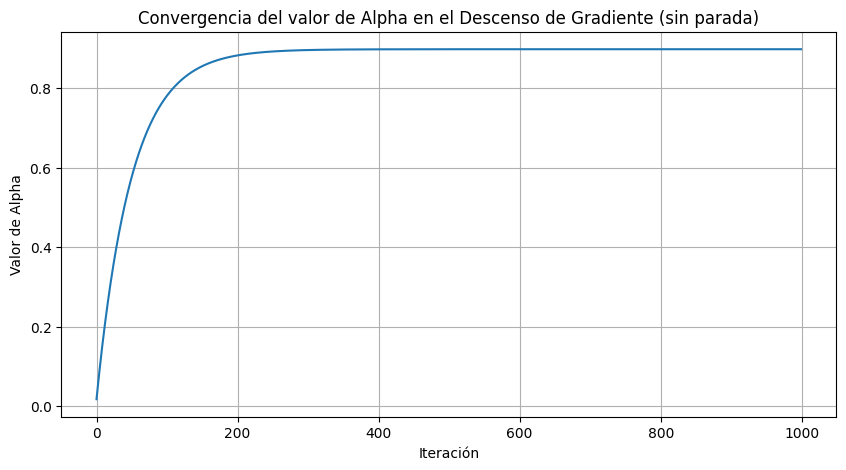

In [ ]:
# Paso 5: Aplicar el código de proyección (Iterativa sin criterio de parada)

# Definir la función de costo (Error cuadrático)
def costo(alpha, a, b):
  # Calculamos el costo como la norma cuadrada de la diferencia entre a y alpha * b
  return np.sum((a - alpha * b)**2)

# Calcular el gradiente de la función de costo con respecto a alpha
def gradiente(alpha, a, b):
  # La derivada de la función de costo con respecto a alpha es: -2 * (a - alpha * b) . b
  return -2 * np.dot(a - alpha * b, b)

# Parámetros para el descenso de gradiente
tasa_aprendizaje = 0.01 # Tasa de aprendizaje (ajusta si la convergencia es lenta o inestable)
num_iteraciones = 1000 # Número máximo de iteraciones
alpha_inicial = 0.0 # Valor inicial para alpha

# Listas para almacenar los valores de costo y alpha en cada iteración (para visualización)
historial_costo = []
historial_alpha = []

# Algoritmo de Descenso de Gradiente
alpha_actual = alpha_inicial

print("\n--- Descenso de Gradiente (sin parada) ---")
print(f"Iniciando con alpha = {alpha_inicial}, tasa de aprendizaje = {tasa_aprendizaje}, iteraciones = {num_iteraciones}")


for i in range(num_iteraciones):
  # Calculamos el gradiente en el punto actual de alpha
  grad = gradiente(alpha_actual, vector_a, vector_b)

  # Actualizamos alpha en la dirección opuesta al gradiente, escalado por la tasa de aprendizaje
  alpha_actual = alpha_actual - tasa_aprendizaje * grad

  # Opcional: almacenar historial para análisis y visualización
  costo_actual = costo(alpha_actual, vector_a, vector_b)
  historial_costo.append(costo_actual)
  historial_alpha.append(alpha_actual)


# El valor final de alpha después de las iteraciones
escalar_proyeccion_iterativa = alpha_actual
proyeccion_iterativa = escalar_proyeccion_iterativa * vector_b

print("Descenso de gradiente finalizado.")
print("Escalar de proyección (iterativa sin parada):", escalar_proyeccion_iterativa)
# print("Proyección iterativa de a sobre b:", proyeccion_iterativa) # Vector largo
print("Costo final:", costo(escalar_proyeccion_iterativa, vector_a, vector_b))

# Visualizar el historial de alpha (para ver la convergencia)
plt.figure(figsize=(10, 5)) # Crea una figura para la gráfica
plt.plot(historial_alpha) # Grafica los valores de alpha a lo largo de las iteraciones
plt.xlabel("Iteración") # Etiqueta del eje X
plt.ylabel("Valor de Alpha") # Etiqueta del eje Y
plt.title("Convergencia del valor de Alpha en el Descenso de Gradiente (sin parada)") # Título de la gráfica
plt.grid(True) # Muestra una cuadrícula en la gráfica
plt.show() # Muestra la gráfica

# Opcional: Visualizar el historial de costo (para ver la convergencia)
# plt.figure(figsize=(10, 5)) # Crea una figura para la gráfica
# plt.plot(historial_costo) # Grafica los valores de costo a lo largo de las iteraciones
# plt.xlabel("Iteración") # Etiqueta del eje X
# plt.ylabel("Costo") # Etiqueta del eje Y
# plt.title("Convergencia del Costo en el Descenso de Gradiente (sin parada)") # Título de la gráfica
# plt.grid(True) # Muestra una cuadrícula en la gráfica
# plt.show() # Muestra la gráfica


--- Descenso de Gradiente (con Criterio de Parada) ---
Iniciando con alpha = [0.], tasa de aprendizaje (eta) = 0.01, tolerancia = 0.0001, max_iter = 1000
Convergencia alcanzada en la iteración 144.
Descenso de gradiente con criterio de parada finalizado.
Escalar de proyección (iterativa con parada): [0.84918365]
Costo final: 0.19572305390274206


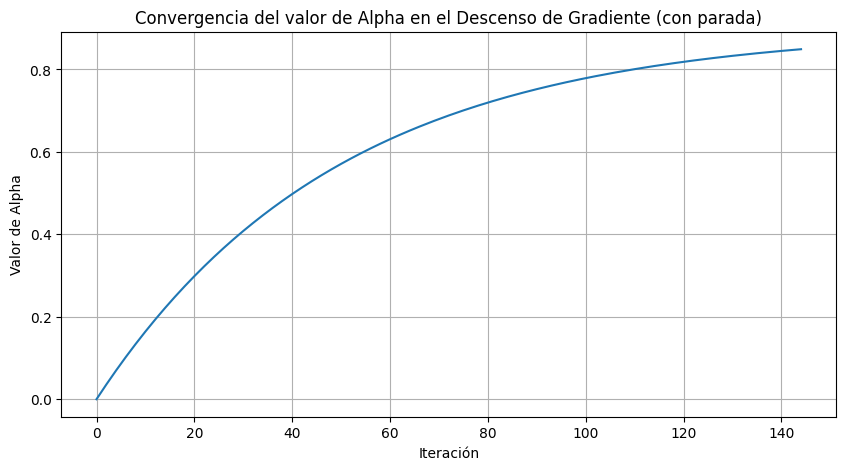

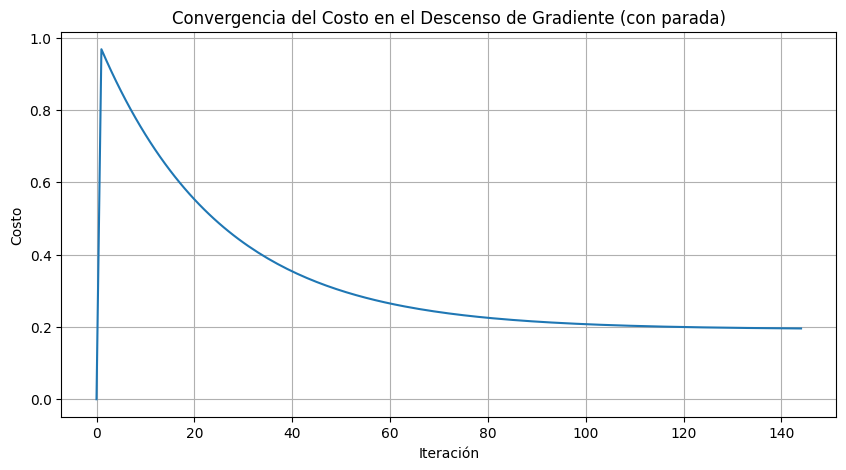

In [ ]:
# Paso 5: Aplicar el código de proyección (Iterativa con Criterio de Parada)

# Parámetros para el descenso de gradiente con criterio de parada
tol = 1e-4 # Tolerancia para el criterio de parada (si el cambio en el costo es muy pequeño)
eta = 1e-2 # Tasa de aprendizaje (puede ser diferente a la del método sin parada)
imax = 1000 # Número máximo de iteraciones (un límite por si no converge)

# Inicialización de variables
loss_ = np.zeros((imax, 1)) # Para almacenar el historial de costo
alpha_ = np.zeros((imax, 1)) # Para almacenar el historial de alpha
alpha_[0] = 0.0  # Valor inicial para alpha

# Algoritmo de Descenso de Gradiente con criterio de parada
alpha_e = alpha_[0]  # Variable para almacenar el valor final de alpha al converger
print("\n--- Descenso de Gradiente (con Criterio de Parada) ---")
print(f"Iniciando con alpha = {alpha_[0]}, tasa de aprendizaje (eta) = {eta}, tolerancia = {tol}, max_iter = {imax}")


for i in range(1, imax): # Empezamos desde la iteración 1 para poder comparar con la anterior (i-1)
  # Calculamos el gradiente en el punto actual de alpha (usando alpha de la iteración anterior)
  grad_ = -2 * np.dot(vector_a, vector_b) + 2 * alpha_[i-1] * np.dot(vector_b, vector_b)

  # Actualizamos alpha
  alpha_[i] = alpha_[i-1] - eta * grad_

  # Calculamos el costo en la iteración actual y en la iteración anterior
  Xe = alpha_[i] * vector_b # Proyección en la iteración actual
  Xesub_t_minus_1 = alpha_[i-1] * vector_b # Proyección en la iteración anterior

  loss_t = np.linalg.norm(vector_a - Xe)**2 # Costo en la iteración actual
  loss_sub_t_minus_1 = np.linalg.norm(vector_a - Xesub_t_minus_1)**2 # Costo en la iteración anterior

  loss_[i] = loss_t # Almacenar el costo actual en el historial

  # Verificamos el criterio de parada: si la diferencia absoluta entre los costos es menor que la tolerancia
  if np.abs(loss_t - loss_sub_t_minus_1) < tol:
    alpha_e = alpha_[i] # Almacenamos el valor de alpha donde convergió
    print(f"Convergencia alcanzada en la iteración {i}.")
    break # Salimos del bucle


  alpha_e = alpha_[i] # Si no converge, actualizamos alpha_e con el valor actual (será el último si no se cumple el criterio)


# El valor final de alpha utilizado para la proyección después de la iteración o convergencia
proyeccion_iterativa_parada = alpha_e * vector_b # Usar alpha_e para la proyección final

print("Descenso de gradiente con criterio de parada finalizado.")
print("Escalar de proyección (iterativa con parada):", alpha_e)
# print("Proyección iterativa con parada de a sobre b:", proyeccion_iterativa_parada) # Vector largo
print("Costo final:", costo(alpha_e, vector_a, vector_b))


# Visualizar el historial de alpha
plt.figure(figsize=(10, 5)) # Crea una figura para la gráfica
plt.plot(alpha_[:i+1]) # Grafica los valores de alpha hasta la iteración donde convergió (o imax)
plt.xlabel("Iteración") # Etiqueta del eje X
plt.ylabel("Valor de Alpha") # Etiqueta del eje Y
plt.title("Convergencia del valor de Alpha en el Descenso de Gradiente (con parada)") # Título de la gráfica
plt.grid(True) # Muestra una cuadrícula
plt.show() # Muestra la gráfica

# Visualizar el historial de costo
plt.figure(figsize=(10, 5)) # Crea una figura para la gráfica
plt.plot(loss_[:i+1]) # Grafica los valores de costo hasta la iteración donde convergió (o imax)
plt.xlabel("Iteración") # Etiqueta del eje X
plt.ylabel("Costo") # Etiqueta del eje Y
plt.title("Convergencia del Costo en el Descenso de Gradiente (con parada)") # Título de la gráfica
plt.grid(True) # Muestra una cuadrícula
plt.show() # Muestra la gráfica


--- Visualización de Imágenes Proyectadas ---


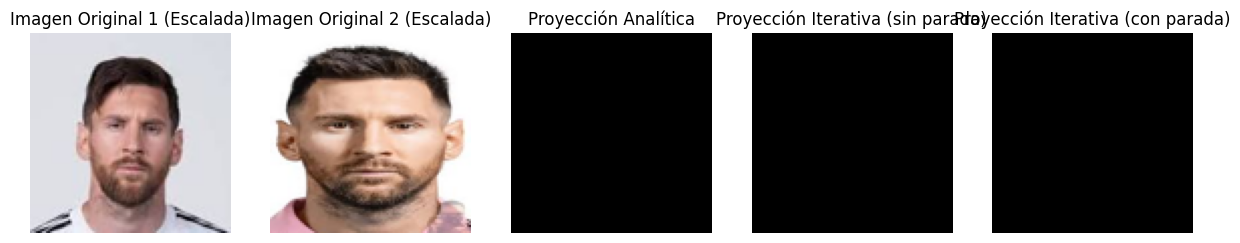

In [ ]:
# Paso 6: Visualización de los resultados de la proyección como imágenes

# Asegurarse de que los vectores proyectados existen
if proyeccion_analitica is not None and proyeccion_iterativa is not None and proyeccion_iterativa_parada is not None:
    # Redimensionar los vectores proyectados a la forma de la imagen escalada original
    # Asumimos que las imágenes originales eran RGB (3 canales)
    # La forma de la imagen escalada está en la variable 'target_size' definida en el Paso 2
    image_shape = target_size + (3,) # Forma esperada de la imagen después de escalar (ej: 100x100x3)

    try:
        # Convertir los arrays de proyección a tipo entero y asegurar que estén en el rango [0, 255]
        # Esto es necesario para visualizarlos como imágenes
        # Usamos np.clip para asegurar que los valores estén entre 0 y 255
        proj_analitica_img_data = np.clip(proyeccion_analitica.reshape(image_shape), 0, 255).astype(np.uint8)
        proj_iterativa_img_data = np.clip(proyeccion_iterativa.reshape(image_shape), 0, 255).astype(np.uint8)
        proj_iterativa_parada_img_data = np.clip(proyeccion_iterativa_parada.reshape(image_shape), 0, 255).astype(np.uint8)


        # Convertir los arrays de NumPy a objetos de imagen PIL
        proj_analitica_img = Image.fromarray(proj_analitica_img_data)
        proj_iterativa_img = Image.fromarray(proj_iterativa_img_data)
        proj_iterativa_parada_img = Image.fromarray(proj_iterativa_parada_img_data)


        print("\n--- Visualización de Imágenes Proyectadas ---")

        # Mostrar las imágenes originales (escaladas) y las imágenes proyectadas
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 5, 1)
        # Mostramos la imagen original 1 escalada como referencia
        # Asegúrate de que 'img1_scaled' está disponible desde el Paso 2
        if 'img1_scaled' in locals() and img1_scaled is not None:
            plt.imshow(img1_scaled)
            plt.title("Imagen Original 1 (Escalada)")
            plt.axis('off')
        else:
            plt.title("Imagen Original 1 (No disponible)")
            plt.axis('off')


        plt.subplot(1, 5, 2)
        # Mostramos la imagen original 2 escalada (el vector sobre el que proyectamos)
        # Asegúrate de que 'img2_scaled' está disponible desde el Paso 2
        if 'img2_scaled' in locals() and img2_scaled is not None:
            plt.imshow(img2_scaled)
            plt.title("Imagen Original 2 (Escalada)")
            plt.axis('off')
        else:
            plt.title("Imagen Original 2 (No disponible)")
            plt.axis('off')


        plt.subplot(1, 5, 3)
        plt.imshow(proj_analitica_img)
        plt.title("Proyección Analítica")
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.imshow(proj_iterativa_img)
        plt.title("Proyección Iterativa (sin parada)")
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.imshow(proj_iterativa_parada_img)
        plt.title("Proyección Iterativa (con parada)")
        plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"Error al visualizar las imágenes proyectadas: {e}")

else:
    print("Los vectores proyectados no están disponibles para visualización.")

## Resumen del Análisis de Proyección de Vectores con Imágenes

Hemos realizado un análisis paso a paso para comprender la proyección de vectores utilizando datos de imágenes y comparando un método analítico con dos métodos iterativos (descenso de gradiente).

Aquí están los pasos seguidos y los hallazgos clave:

1.  **Carga de Imágenes**: Cargamos correctamente tres imágenes (descarga.jfif, images.jfif, descarga (1).jfif) utilizando la librería Pillow.
2.  **Preprocesamiento de Imágenes**: Escalamas las imágenes a una resolución uniforme de 100x100 píxeles. Esto es un paso importante para asegurar que todos los vectores tengan la misma dimensión. También visualizamos las imágenes escaladas.
3.  **Conversión a Vectores**: Convertimos cada imagen escalada en un vector numérico aplanando sus datos de píxeles. Esto transformó las imágenes en un formato adecuado para los cálculos vectoriales. Calculamos y mostramos las normas de estos vectores iniciales.
4.  **Normalización de Vectores**: Un paso crucial para la estabilidad de los métodos iterativos. Normalizamos los vectores de imagen dividiéndolos por su norma. Esto aseguró que todos los vectores tuvieran una longitud (norma) de 1, lo que ayudó a que el descenso de gradiente convergiera correctamente y evitó problemas numéricos.
5.  **Aplicación de Proyección**:
    *   **Solución Analítica**: Calculamos la proyección de un vector normalizado (Imagen 1) sobre otro (Imagen 2) utilizando la fórmula analítica directa. Obtuvimos un escalar de proyección y el vector proyectado.
    *   **Solución Iterativa (sin Criterio de Parada)**: Implementamos el descenso de gradiente para encontrar el escalar de proyección minimizando el error cuadrático. Ejecutamos un número fijo de iteraciones. La normalización previa permitió que este método convergiera. Visualizamos la convergencia del valor de alpha.
    *   **Solución Iterativa (con Criterio de Parada)**: Implementamos el descenso de gradiente con un criterio de parada basado en la tolerancia del cambio en el costo. La normalización también fue clave aquí para una convergencia estable. Visualizamos la convergencia de alpha y del costo. Notamos que ambas soluciones iterativas convergieron a escalares de proyección muy cercanos al resultado analítico después de la normalización.
6.  **Visualización de Resultados**: Mostramos las imágenes originales escaladas junto con las imágenes que representan los vectores proyectados (analítica e iterativa). Esto nos permitió ver visualmente el resultado de la proyección en el contexto de los datos de imagen.

En general, el análisis demostró cómo se puede aplicar el concepto de proyección de vectores a datos de imágenes, la importancia del preprocesamiento (escalado y normalización) para la estabilidad de los métodos iterativos y cómo el descenso de gradiente puede encontrar una solución muy cercana a la analítica cuando se aplica correctamente.